# Project Number-19 (Covid 19 Dataset)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('covid.csv',parse_dates=['Date'])
data
# importing the csv dataset and parsing the date in correct format
# This is a dataset which records the Covid 19 cases for last five months(January to May) accross the Globe. 
# The entries are maintained datewise in each country
# Confirmed -> Number of people confirmed to be affected by Covid19
# Recovered -> Number of people recovered from it
# Deaths -> Number of casulaties

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


# EDA

In [3]:
data.info()
# the dataset contains 23688 entries(rows)
# no null values (missing data) present
# dadatypes of 5 attribues are also mentioned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


In [4]:
data['Country'].value_counts()

Malawi                126
Dominican Republic    126
Djibouti              126
Lebanon               126
France                126
                     ... 
Eritrea               126
Haiti                 126
Latvia                126
Andorra               126
Kenya                 126
Name: Country, Length: 188, dtype: int64

In [5]:
data_dates=pd.DataFrame()
data_dates['month']=data['Date'].dt.month_name()
data_dates['year']=data['Date'].dt.year
data_dates['day']=data['Date'].dt.day_name()
data_dates['Confirmed']=data['Confirmed']
data_dates

# distributing the dates into year,month & date format. 
# checking the numberof entries for confirmed cases in each date

,month,year,day,Confirmed
0,January,2020,Wednesday,0
1,January,2020,Wednesday,0
2,January,2020,Wednesday,0
3,January,2020,Wednesday,0
4,January,2020,Wednesday,0
...,...,...,...,...
23683,May,2020,Tuesday,429
23684,May,2020,Tuesday,9
23685,May,2020,Tuesday,249
23686,May,2020,Tuesday,920


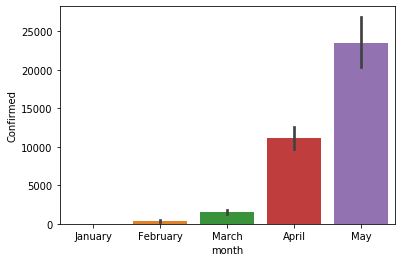

In [6]:
sns.barplot(x='month',y='Confirmed',data=data_dates)
plt.show()
# We can observe number of entries for Confirmed cases have increased over the months

In [7]:
data_dates=pd.DataFrame()
data_dates['month']=data['Date'].dt.month_name()
data_dates['year']=data['Date'].dt.year
data_dates['day']=data['Date'].dt.day_name()
data_dates['Recovered']=data['Recovered']
data_dates
# checking the number of entries for Recovered cases in each date

,month,year,day,Recovered
0,January,2020,Wednesday,0
1,January,2020,Wednesday,0
2,January,2020,Wednesday,0
3,January,2020,Wednesday,0
4,January,2020,Wednesday,0
...,...,...,...,...
23683,May,2020,Tuesday,365
23684,May,2020,Tuesday,6
23685,May,2020,Tuesday,10
23686,May,2020,Tuesday,336


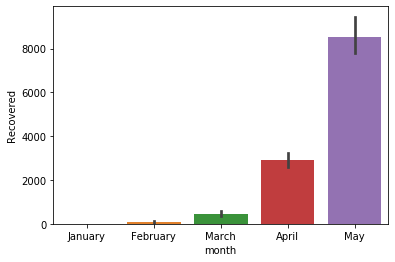

In [8]:
sns.barplot(x='month',y='Recovered',data=data_dates)
plt.show()
# We can observe number of entries for Recovered cases have increased over the months

In [9]:
data_dates=pd.DataFrame()
data_dates['month']=data['Date'].dt.month_name()
data_dates['year']=data['Date'].dt.year
data_dates['day']=data['Date'].dt.day_name()
data_dates['Deaths']=data['Deaths']
data_dates
# checking the number of entries for Death cases in each date

,month,year,day,Deaths
0,January,2020,Wednesday,0
1,January,2020,Wednesday,0
2,January,2020,Wednesday,0
3,January,2020,Wednesday,0
4,January,2020,Wednesday,0
...,...,...,...,...
23683,May,2020,Tuesday,3
23684,May,2020,Tuesday,1
23685,May,2020,Tuesday,49
23686,May,2020,Tuesday,7


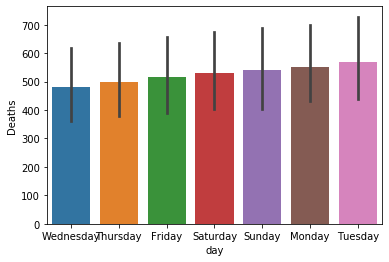

In [10]:
sns.barplot(x='day',y='Deaths',data=data_dates)
plt.show()
# We can observe number of entries for casulaties are distrbuted almost equally among all days of the week.

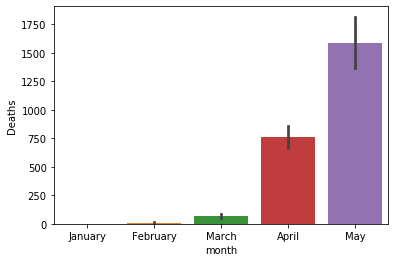

In [11]:
sns.barplot(x='month',y='Deaths',data=data_dates)
plt.show()
# We can observe number of entries for Death cases have increased over the months

In [12]:
data_dates=pd.DataFrame()
data_dates['month']=data['Date'].dt.month_name()
data_dates['year']=data['Date'].dt.year
data_dates['day']=data['Date'].dt.day_name()
data_dates['Confirmed']=data['Confirmed']
data_dates['Recovered']=data['Recovered']
data_dates['Deaths']=data['Deaths']
data_dates

,month,year,day,Confirmed,Recovered,Deaths
0,January,2020,Wednesday,0,0,0
1,January,2020,Wednesday,0,0,0
2,January,2020,Wednesday,0,0,0
3,January,2020,Wednesday,0,0,0
4,January,2020,Wednesday,0,0,0
...,...,...,...,...,...,...
23683,May,2020,Tuesday,429,365,3
23684,May,2020,Tuesday,9,6,1
23685,May,2020,Tuesday,249,10,49
23686,May,2020,Tuesday,920,336,7


In [13]:
df=data_dates
df.head()

,month,year,day,Confirmed,Recovered,Deaths
0,January,2020,Wednesday,0,0,0
1,January,2020,Wednesday,0,0,0
2,January,2020,Wednesday,0,0,0
3,January,2020,Wednesday,0,0,0
4,January,2020,Wednesday,0,0,0


In [14]:
df1=df.drop(['year','day'],axis=1)
df1
# We can drop the 'year' column since all the entries are for the same year 
# We will calculate the entries on monthly basis. So can drop date column as well

,month,Confirmed,Recovered,Deaths
0,January,0,0,0
1,January,0,0,0
2,January,0,0,0
3,January,0,0,0
4,January,0,0,0
...,...,...,...,...
23683,May,429,365,3
23684,May,9,6,1
23685,May,249,10,49
23686,May,920,336,7


In [15]:
df1['month'].value_counts()
# checking the number of entries monthly

March       5828
April       5640
February    5452
May         4888
January     1880
Name: month, dtype: int64

     month  Confirmed  Recovered  Deaths
0  January          0          0       0
1  January          0          0       0
2  January          0          0       0
3  January          0          0       0
4  January          0          0       0


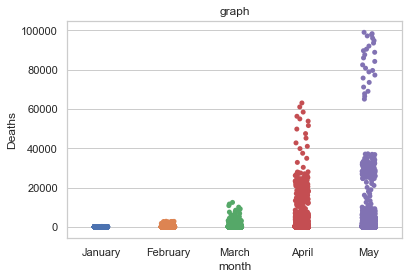

In [16]:
print(df1.head())
sns.set(style='whitegrid')
ax=sns.stripplot(x='month',y='Deaths',data=df1);
plt.title('graph')
plt.show()
# checking the number of entries for casualties in each month

In [17]:
df1.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [18]:
df1['month'].unique()

array(['January', 'February', 'March', 'April', 'May'], dtype=object)

In [19]:
df1['month'].describe()

count     23688
unique        5
top       March
freq       5828
Name: month, dtype: object

In [20]:
df2=df1[df1['month']=='January']
c1=df2['Confirmed'].sum()
d1=df2['Deaths'].sum()
r1=df2['Recovered'].sum()
rr1=r1/c1
cs1=d1/c1

In [21]:
df3=df1[df1['month']=='February']
c2=df3['Confirmed'].sum()
r2=df3['Recovered'].sum()
d2=df3['Deaths'].sum()
rr2=r2/c2
cs2=d2/c2

In [22]:
df4=df1[df1['month']=='March']
c3=df4['Confirmed'].sum()
r3=df4['Recovered'].sum()
d3=df4['Deaths'].sum()
rr3=r3/c3
cs3=d3/c3

In [23]:
df5=df1[df1['month']=='April']
c4=df5['Confirmed'].sum()
r4=df5['Recovered'].sum()
d4=df5['Deaths'].sum()
rr4=r4/c4
cs4=d4/c4

In [24]:
df6=df1[df1['month']=='May']
c5=df6['Confirmed'].sum()
r5=df6['Recovered'].sum()
d5=df6['Deaths'].sum()
rr5=r5/c5
cs5=d5/c5

In [25]:
m={'month':['January','February','March','April','May'],'confirmed':[c1,c2,c3,c4,c5],'recovered':[r1,r2,r3,r4,r5],'death':[d1,d2,d3,d4,d5],'recovery_rate':[rr1,rr2,rr3,rr4,rr5],'casualty_rate':[cs1,cs2,cs3,cs4,cs5]}
s=pd.DataFrame(m)
s


,month,confirmed,recovered,death,recovery_rate,casualty_rate
0,January,38534,844,889,0.021903,0.023071
1,February,1671783,380794,46898,0.227777,0.028053
2,March,8899917,2706089,396863,0.304058,0.044592
3,April,63046693,16322390,4291044,0.258894,0.068061
4,May,115121451,41747602,7746343,0.362640,0.067288


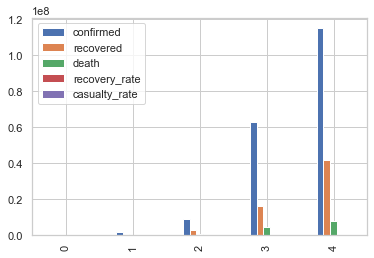

In [26]:
s.plot.bar()
# checking monthly comparison of covid cases

{'bodies': [<matplotlib.collections.PolyCollection at 0x1cbbc3e54c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1cbbc3c4208>,
 'cmins': <matplotlib.collections.LineCollection at 0x1cbbc3e5988>,
 'cbars': <matplotlib.collections.LineCollection at 0x1cbbc3d6948>}

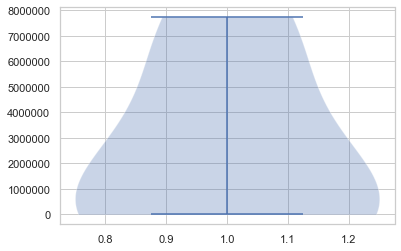

In [27]:
plt.violinplot(s['death'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1cbbbfeda08>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1cbbc3e5888>,
 'cmins': <matplotlib.collections.LineCollection at 0x1cbbc005188>,
 'cbars': <matplotlib.collections.LineCollection at 0x1cbbc00b248>}

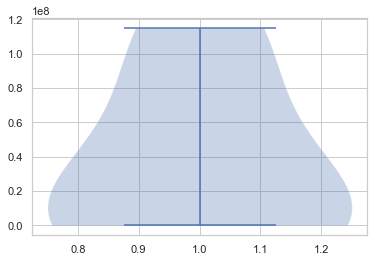

In [28]:
plt.violinplot(s['confirmed'])

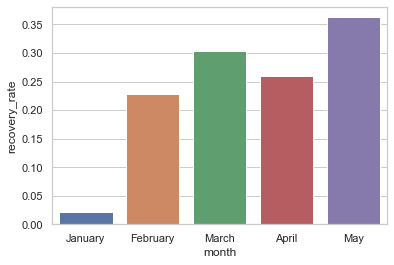

In [29]:
sns.barplot(x='month',y='recovery_rate',data=s)
plt.show()
# recovery rate is going up over the months

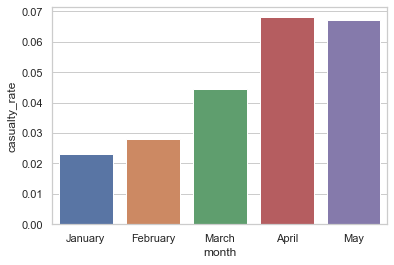

In [30]:
sns.barplot(x='month',y='casualty_rate',data=s)
plt.show()
# casulty rate is going up over the months

In [31]:
le=LabelEncoder()

In [32]:
s['month']=le.fit_transform(s['month'])

In [33]:
s.head()

,month,confirmed,recovered,death,recovery_rate,casualty_rate
0,2,38534,844,889,0.021903,0.023071
1,1,1671783,380794,46898,0.227777,0.028053
2,3,8899917,2706089,396863,0.304058,0.044592
3,0,63046693,16322390,4291044,0.258894,0.068061
4,4,115121451,41747602,7746343,0.362640,0.067288


In [34]:
s.corr()

,month,confirmed,recovered,death,recovery_rate,casualty_rate
month,1.000000,0.349038,0.472100,0.333424,0.346439,0.112080
confirmed,0.349038,1.000000,0.987918,0.999695,0.642159,0.880373
recovered,0.472100,0.987918,1.000000,0.986033,0.639407,0.813093
death,0.333424,0.999695,0.986033,1.000000,0.626499,0.877082
recovery_rate,0.346439,0.642159,0.639407,0.626499,1.000000,0.744960
casualty_rate,0.112080,0.880373,0.813093,0.877082,0.744960,1.000000


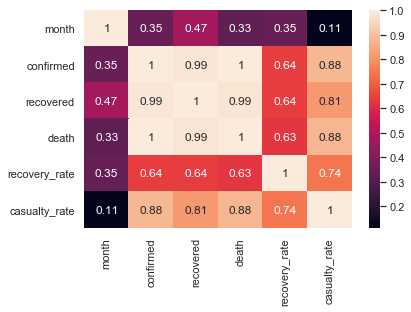

In [35]:
sns.heatmap(s.corr(),annot=True)

In [36]:
s.describe()

,month,confirmed,recovered,death,recovery_rate,casualty_rate
count,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000,5.000000
mean,2.000000,3.775568e+07,1.223154e+07,2.496407e+06,0.235054,0.046213
std,1.581139,5.045390e+07,1.780939e+07,3.443049e+06,0.129513,0.021151
min,0.000000,3.853400e+04,8.440000e+02,8.890000e+02,0.021903,0.023071
25%,1.000000,1.671783e+06,3.807940e+05,4.689800e+04,0.227777,0.028053
50%,2.000000,8.899917e+06,2.706089e+06,3.968630e+05,0.258894,0.044592
75%,3.000000,6.304669e+07,1.632239e+07,4.291044e+06,0.304058,0.067288
max,4.000000,1.151215e+08,4.174760e+07,7.746343e+06,0.362640,0.068061


month               AxesSubplot(0.125,0.536818;0.0945122x0.343182)
confirmed        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
recovered        AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
death            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
recovery_rate    AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
casualty_rate    AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
dtype: object

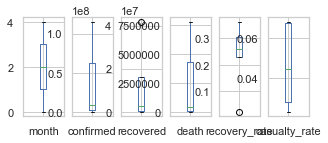

In [37]:
s.plot(kind='box',subplots=True,layout=(2,7))

In [38]:
z=np.abs(zscore(s))
print(np.where(z>3))
# No Null values present in the dataset

(array([], dtype=int64), array([], dtype=int64))


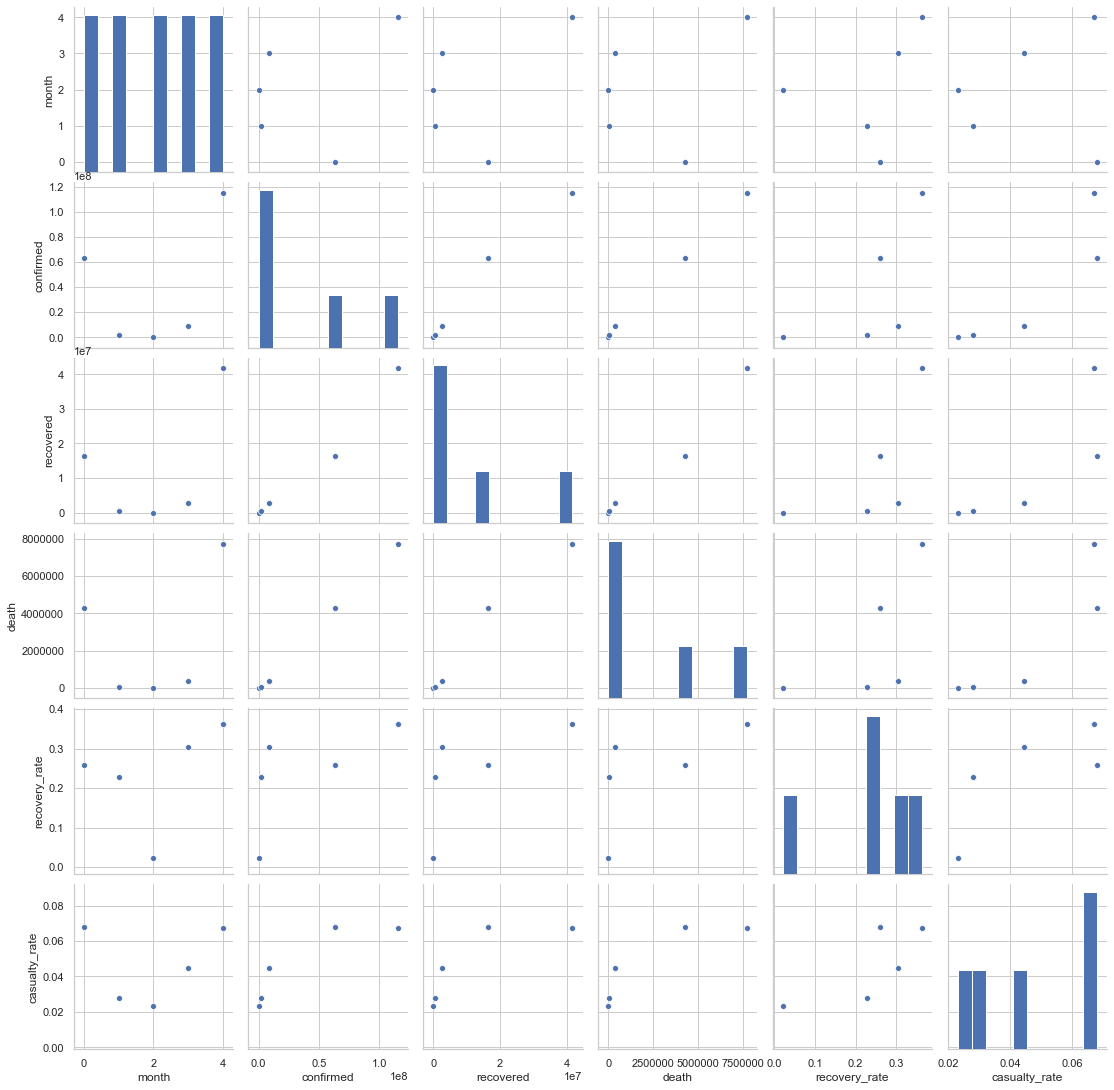

In [39]:
sns.pairplot(s)

In [40]:
s.shape

(5, 6)

In [41]:
s

,month,confirmed,recovered,death,recovery_rate,casualty_rate
0,2,38534,844,889,0.021903,0.023071
1,1,1671783,380794,46898,0.227777,0.028053
2,3,8899917,2706089,396863,0.304058,0.044592
3,0,63046693,16322390,4291044,0.258894,0.068061
4,4,115121451,41747602,7746343,0.362640,0.067288


# Training & testing the model

In [42]:
x=s.iloc[:,1:-1]
x

,confirmed,recovered,death,recovery_rate
0,38534,844,889,0.021903
1,1671783,380794,46898,0.227777
2,8899917,2706089,396863,0.304058
3,63046693,16322390,4291044,0.258894
4,115121451,41747602,7746343,0.362640


In [43]:
y=s.iloc[:,-1]
y

0    0.023071
1    0.028053
2    0.044592
3    0.068061
4    0.067288
Name: casualty_rate, dtype: float64

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [45]:
lm=LinearRegression()

In [46]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lm.score(x_train,y_train)

1.0

In [48]:
pred=lm.predict(x_test)
pred

array([0.02966529])

In [49]:
print('error:')   ## calculating the error
print('mean absolute error:', mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.00161260455258087
mean squared error: 2.600493443004548e-06
root mean squared error: 0.00161260455258087


In [50]:
lm.coef_

array([ 7.19480990e-09, -3.79178359e-09, -8.07553866e-08,  1.00341295e-13])

# Saving the Model 

In [54]:
from sklearn.externals import joblib

In [52]:
joblib.dump(lm,'covid19.obj')

['covid19.obj']